In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
plt.style.use('seaborn-poster')

### Pregunta 1

In [171]:
npts=200
x = np.random.uniform(0.0, 1.0, npts)
y = np.random.uniform(0.0,1.0,npts)

def PuntosGenerados(x1,y1):
    r=np.random.uniform(0.0)
    r=x1
    pi=2*np.pi*y1
    x2=r*np.cos(pi)
    y2=r*np.sin(pi)
    return(x2,y2)

Text(0.5, 1.0, 'Distribución de Probabilidad de puntos generados al azar con Cambio de Variable')

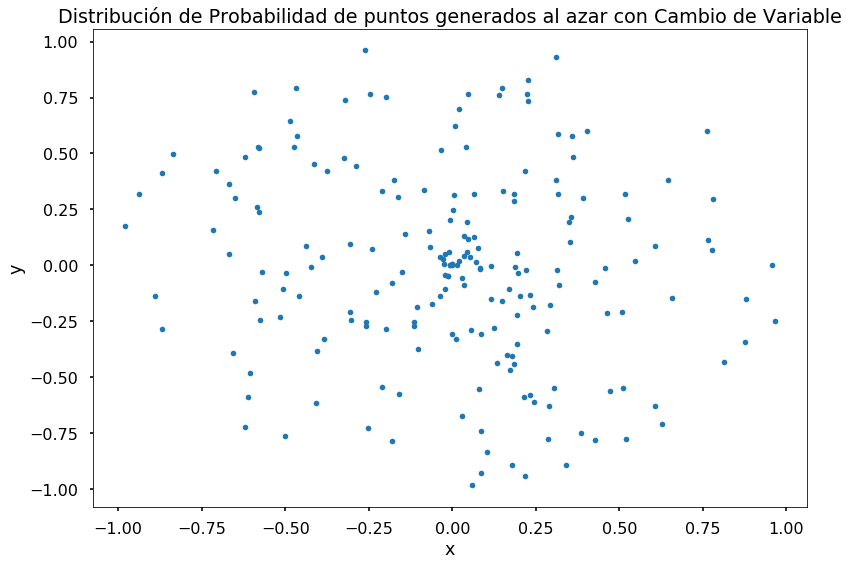

In [172]:
x2,y2=PuntosGenerados(x,y)

plt.plot(x2,y2,'.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Distribución de Probabilidad de puntos generados al azar con Cambio de Variable")

Podemos ver que se forma la distribución dentro de una area en la forma de un circulo, pero podemos que esta distribucion no es tan uniforme puesto que se puede ver como se aglomeran los puntos en el centro. Y se forman ciertos patrones dentro del gráfico.

#### Montecarlo

Aqui está escrito el algoritmo de Montecarlo, basicamente genera un punto y si es válido, lo añade a una listo de puntos, sino sigue preguntando.

In [176]:
X=[]
Y=[]

def Montecarlo(total):
    for i in range(total):
        while True:
            x=np.random.uniform(-1.0,1.0,1)
            y=np.random.uniform(-1.0,1.0,1)
            if(x**2+y**2<=1):
                X.append(x)
                Y.append(y)
                break
    return X,Y
    

Aquí tenemos el grafico a los primeros 200 puntos.

200


Text(0.5, 1.0, 'Distribucion de Probabilidad de puntos generados al azar con el Algoritmo de Montecarlo')

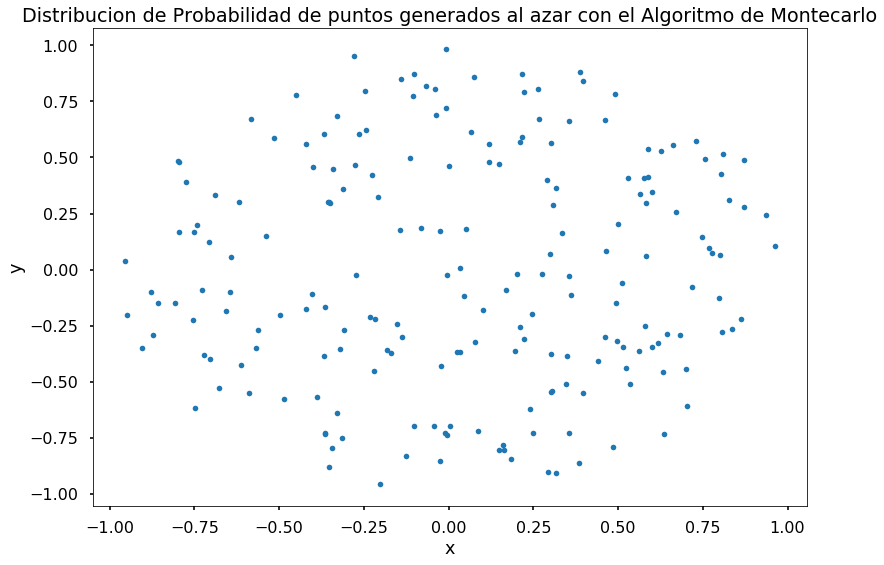

In [177]:

Montecarlo(200)
print(len(X))

plt.plot(X,Y,'.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Distribucion de Probabilidad de puntos generados al azar con el Algoritmo de Montecarlo")

Podemos ver que la distribución es algo más uniforme que con el otro método puesto que no hay aglomeraciones tan notorias como en el otro, sin embargo igual siguen formandose pequeñas aglomeriaciones.

#### Comparacion de Velocidad

In [190]:
import time
total=np.power(10,7)
X=[]
Y=[]

#### Prueba de Velocidad del Metodo de Cambio de Variable

In [191]:
tiempo1=time.time()
x = np.random.uniform(0.0, 1.0, total)
y = np.random.uniform(0.0,1.0,total)
X2,Y2=PuntosGenerados(x,y)
tiempo2=time.time()
print(tiempo2-tiempo1)

#plt.plot(X2,Y2)

2.119267225265503


#### Prueba de Velocidad del Metodo de Montecarlo

In [189]:
tiempoA=time.time()
X1,Y1=Montecarlo(total)
tiempoB=time.time()
print(tiempoB-tiempoA)

#plt.plot(X1,Y1)

338.6734838485718


Podemos ver que el método de Cambio de Variable demora mucho menos que el metodo de Montecarlo, puesto que con 10.000.000 de puntos el primero demoró 2 segundos, mientras que el segundo metodo demoró 338 segundos, que son 5 minutos y medio, que es mucho más que el tiempo del primero.

In [203]:
X=[]
Y=[]
tiempoMonteCarlo=[]
tiempoCambioVariable=[]

for i in range(8):
    total=np.power(10,i)
    tiempoA=time.time()
    Montecarlo(total)
    tiempoB=time.time()
    tiempoMonteCarlo.append(tiempoB-tiempoA)
    
    tiempo1=time.time()
    x = np.random.uniform(0.0, 1.0, total)
    y = np.random.uniform(0.0,1.0,total)
    X2,Y2=PuntosGenerados(x,y)
    tiempo2=time.time()
    tiempoCambioVariable.append(tiempo2-tiempo1)
    

In [197]:
tiempo=[]
for i in range(8):
    tiempototal=np.power(10,i)
    tiempo.append(tiempototal)

#plt.plot(tiempoCambioVariable,)

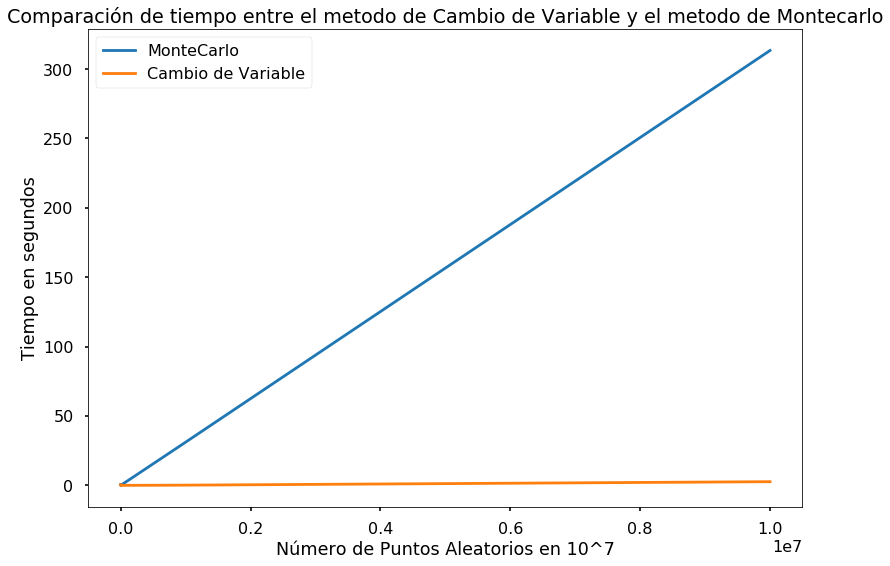

In [211]:
plt.plot(tiempo,tiempoMonteCarlo,'-',label="MonteCarlo")
plt.plot(tiempo,tiempoCambioVariable,label="Cambio de Variable")
plt.xlabel("Número de Puntos Aleatorios en 10^7")
plt.ylabel("Tiempo en segundos")
plt.title("Comparación de tiempo entre el metodo de Cambio de Variable y el metodo de Montecarlo")
plt.legend()

Vemos que el metodo de Cambio de Variable tiene tiempo constante, a diferencia del tiempo del Metodo de Montecarlo que es de orden lineal. Por lo que concluimos que el metodo de Cambio de Variable posee mejor tiempo que el metodo de MonteCarlo, aun cuando generan el "mismo" resultado.

### Pregunta 2

In [42]:

def vidaSer(N,ip,jp,i0,j0):
    noPasos=0
    matriz=np.zeros((N,N))
    matriz[ip,jp]=1
    matriz[i0,j0]=-1
    #print(matriz)
    while True:
        pasox=np.random.randint(-N+1,N-1,1)
        pasoy=np.random.randint(-N+1,N-1,1)
        i0+=pasox
        j0+=pasoy
        if (i0>=N):
            i0=i0-N
        if(j0>=N):
            j0=j0-N
        if(i0<0):
            i0=N-i0
        if(j0<0):
            j0=N-j0
        if(i0==ip and j0==jp):
            break
        noPasos+=1
    return noPasos

In [43]:
N=25
ip=0
jp=0

i0=10
j0=0

total=[]

for i in range(1000):
    t=vidaSer(N,ip,jp,i0,j0)
    total.append(t)
    

Text(0.5, 0, 'Cantidad de Pasos')

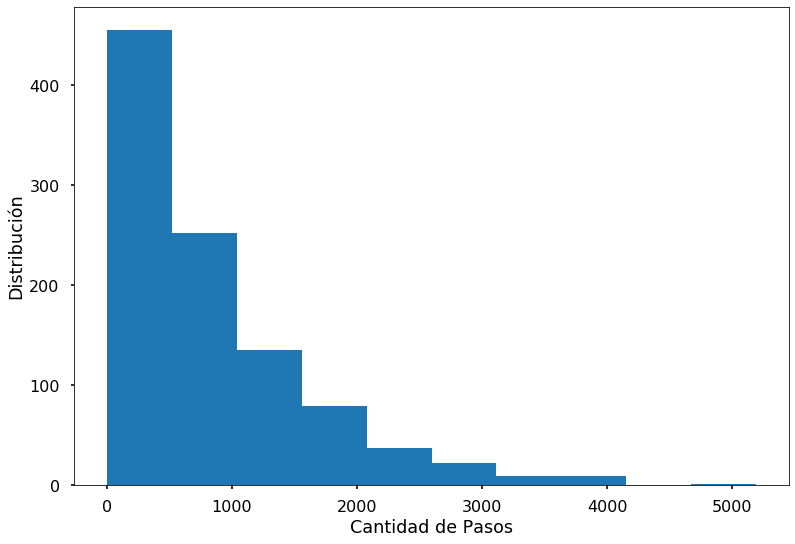

In [44]:
plt.hist(total)
plt.ylabel("Distribución")
plt.xlabel("Cantidad de Pasos")

Podemos ver que la cantidad de pasos son principalmente entre 0 a 1000 pasos, en especial el rango de 500 pasos, esto quiere decir que normalmente al generar posiciones al azar, le toma 500 pasos al depredador agarrar a la presa.